### This problem is about IBM Employee attrition. Here the target variable is 'Attrition' which has 'Yes' and 'No' values, i.e. the target variable is binary and this is a classification dataset.

##### Before working on the dataset we have to see what challenges we have with the dataset. Since the target variable is binary, this is a classification problem. A few things to get to know before starting to work on the dataset would be as follows. 
    a. No. of attributes: It has 35 attributes in total, which is much more than the datasets we have studied   earlier. So, we may have to deal with Over fitting problem.
    b. Balance in target variable: Since the target variable specifies that this is a classification problem, we have to check whether that variable is balanced well. Based on this, we have to decide what strategy we have to take to solve this problem.
    c. Size of the dataset: From ML point of view, if a dataset has only a few hundreds of observations then the size of dataset is very small. A good dataset in this context should have atleast 50K observations.

### Let's perform EDA first

#### Step 1: Download all the libraries which we generally use while performing EDA and the ones needed for Decision Tree and Random forest models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import make_scorer

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#### Step 2: Import the data set on which EDA has to be performed

In [2]:
dataset = pd.read_csv('IBM attrition dataset.csv')

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on IBM attrition dataset.
    b. The main intention of building a model on IBM attrition dataset is to predict whether a person is going  to leave the company.
    c. This is a classification problem with two classes, 'Yes' for leaving the company and 'No' for not leaving the company.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [3]:
dataset.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


##### By having a look at the data above, we can say that 'EmployeeCount' and 'EmployeeNumber' attributes doesn't add any value to the model and can be excluded from the dataset. Since we haven't performed duplicate check yet, let's proceed with further steps as of now and at the end of EDA we can remove the attributes.

#### Step 5: Get to know the structure of the data set using 'info()'method. Using this we can get to know below things:
    a. Data types of attributes in the data set
    b. Whether any of the attributes in the data set has null values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### By having a look at info above, we can say that there are no null values.

#### Step 6: Get the 6-point summary using 'describe()' method.

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


##### By looking at values below, we can say that other than below attributes, all are symmetric:
    a. DistanceFromHome
    b. MonthlyIncome
    c. NumCompaniesWorked
    d. StockOptionLevel
    e. YearsAtCompany
    f. YearsInCurrentRole
    g. YearsSinceLastPromotion
    h. YearsWithCurrManager
    
Also, all of the above attributes except 'StockOptionLevel' are right skewed and 'StockOptionLevel' is left skewed

#### Step 7: Let's perform Univariate analysis

#### As first step, let's see the distribution of categorical attributes

In [6]:
# Let's fetch the categorical attributes

categorical_col = []

for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        categorical_col.append(column)

In [7]:
# Defining a function to plot bar graph and fetch value counts of each categorical attribute
def bar_plot(variable):
      
    # get feature 
    var = dataset[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values, rotation=90)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

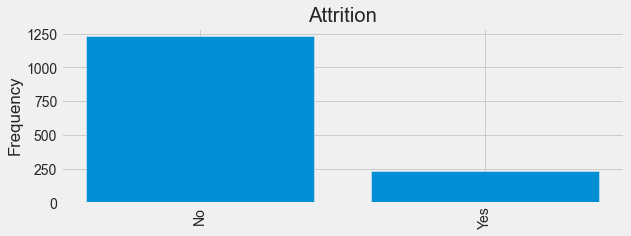

Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64


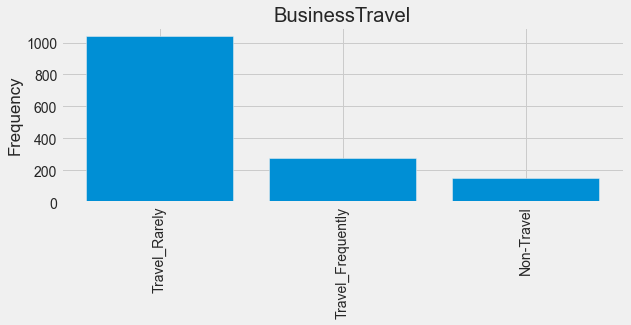

BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


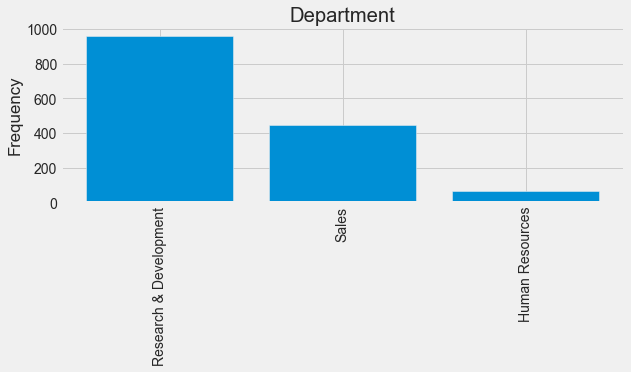

Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


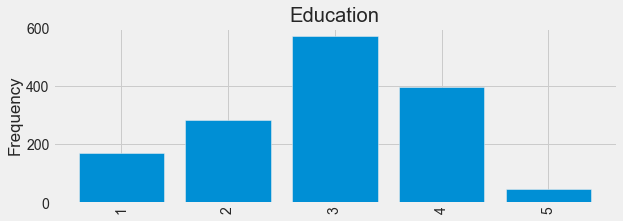

Education:
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


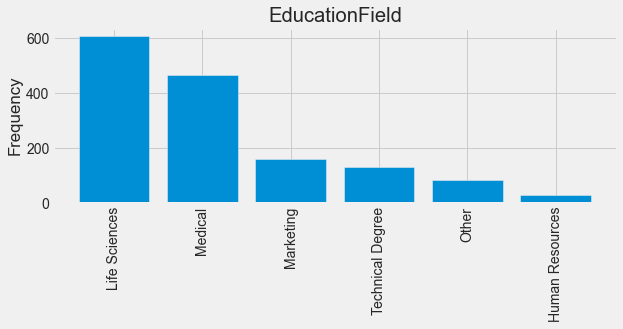

EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


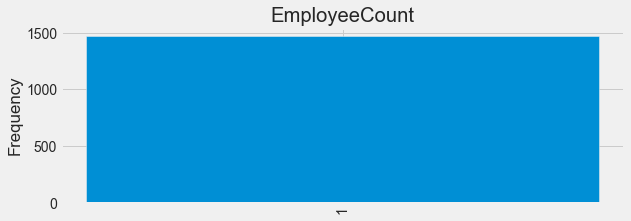

EmployeeCount:
1    1470
Name: EmployeeCount, dtype: int64


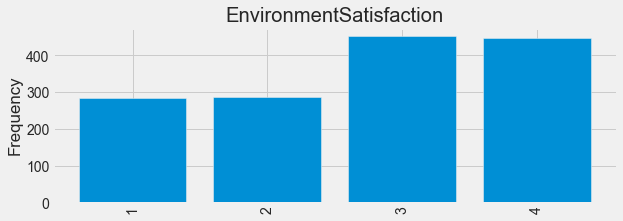

EnvironmentSatisfaction:
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


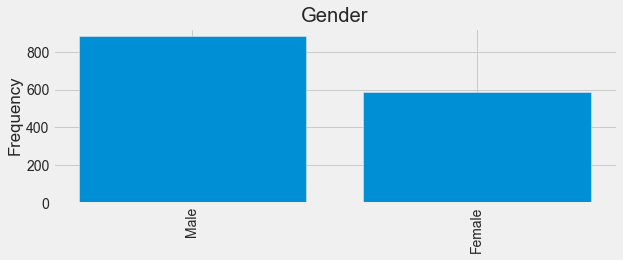

Gender:
Male      882
Female    588
Name: Gender, dtype: int64


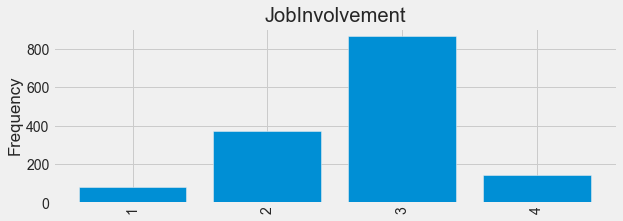

JobInvolvement:
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


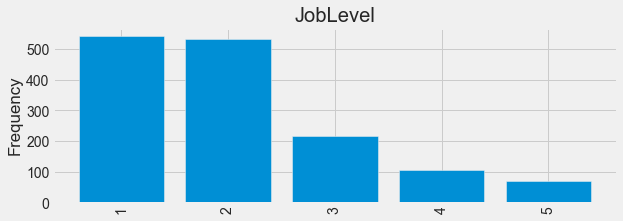

JobLevel:
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


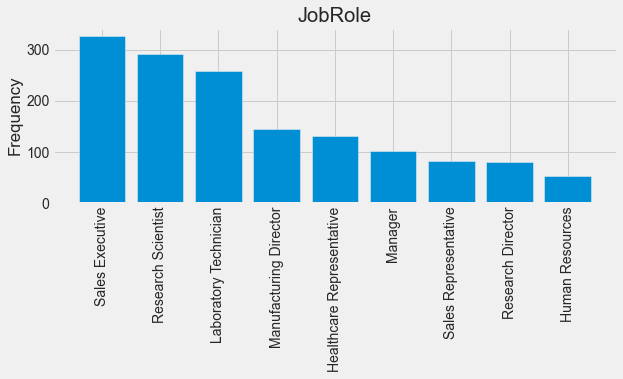

JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


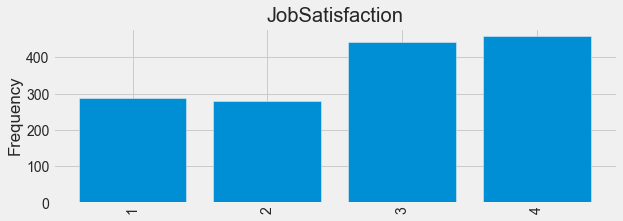

JobSatisfaction:
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


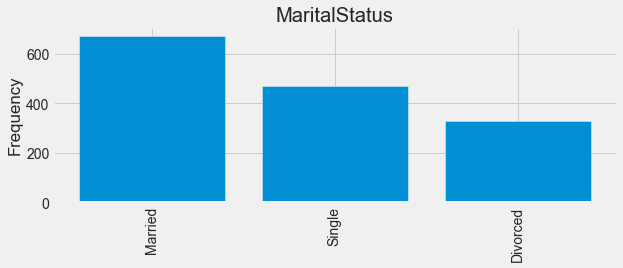

MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


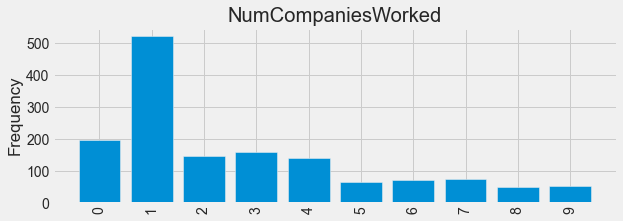

NumCompaniesWorked:
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


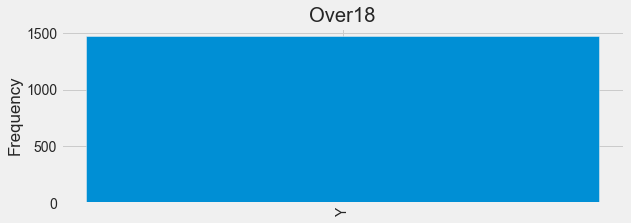

Over18:
Y    1470
Name: Over18, dtype: int64


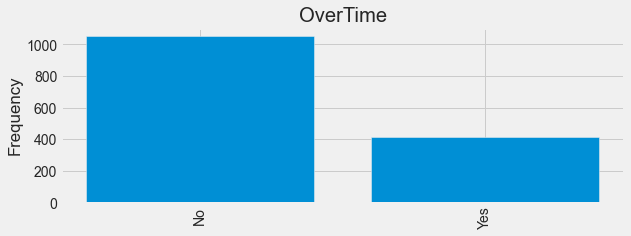

OverTime:
No     1054
Yes     416
Name: OverTime, dtype: int64


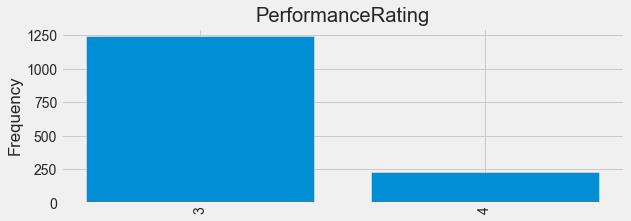

PerformanceRating:
3    1244
4     226
Name: PerformanceRating, dtype: int64


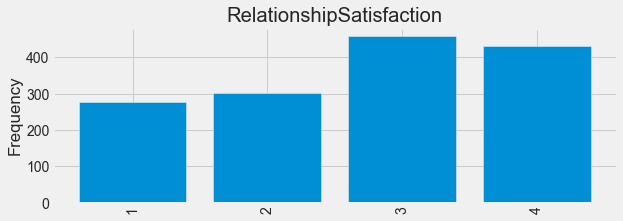

RelationshipSatisfaction:
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


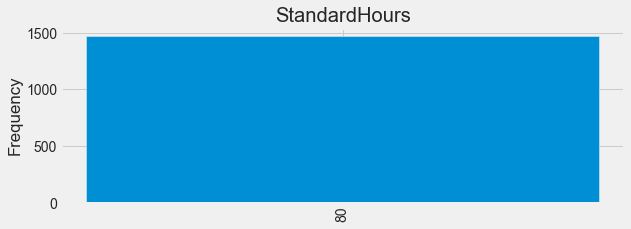

StandardHours:
80    1470
Name: StandardHours, dtype: int64


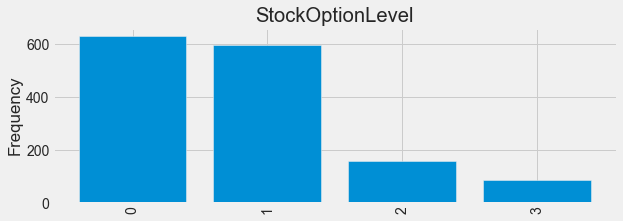

StockOptionLevel:
0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


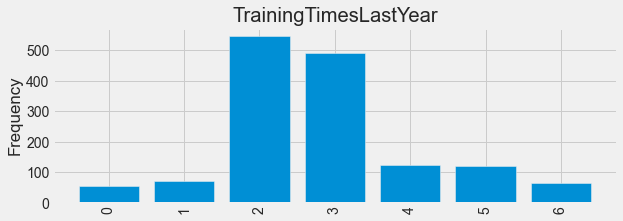

TrainingTimesLastYear:
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


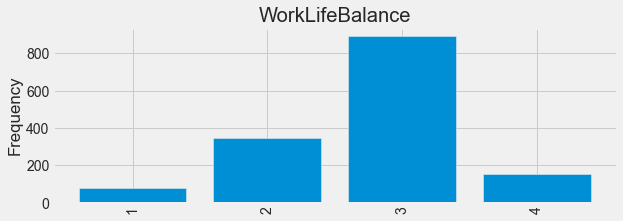

WorkLifeBalance:
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


In [8]:
for i in categorical_col:
    bar_plot(i)

##### By looking at the bar plots and value counts above, We can say that:
    a. Apart from 'EmployeeCount' and 'EmployeeNumber' attributes, 'Over18' and 'StandardHours' also don't add  any value to the dataset. Because they have only one unique value. We can remove these attributes also after performing duplicate check.
    b. Target variable, 'Attrition' is heavily imbalanced
    c. Attributes other than 'EnvironmentSatisfaction', 'Gender', 'JobSatisfaction', 'MaritalStatus' and        'RelationshipSatisfaction' are imbalanced.
    d. Attriutes such as 'BusinessTravel', 'Department', 'Gender', 'JobInvolvement', 'OverTime',                'PerformanceRating' and 'WorkLifeBalance' can be considered while checking whether there is Linear Seperability in the data.
    e. We can reduce dimensionality in 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',   'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel',                     'TrainingTimesLastYear' and 'WorkLifeBalance' attributes by combining values. We can do this after checking whether there is Linear Seperability in the data.

#### Now let's compare the distribution of continuous attributes with Normal distribution and see whether any attribute is skewed or has outliers

In [9]:
# Let's fetch Non-categorical attributes first
non_categorical_col = []

for column in dataset.columns:
    if column not in categorical_col:
        non_categorical_col.append(column)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-10-79413e7b36e8>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-10-79413e7b36e8>:9: UserWarning: FixedFormatter should only be used together with Fixed

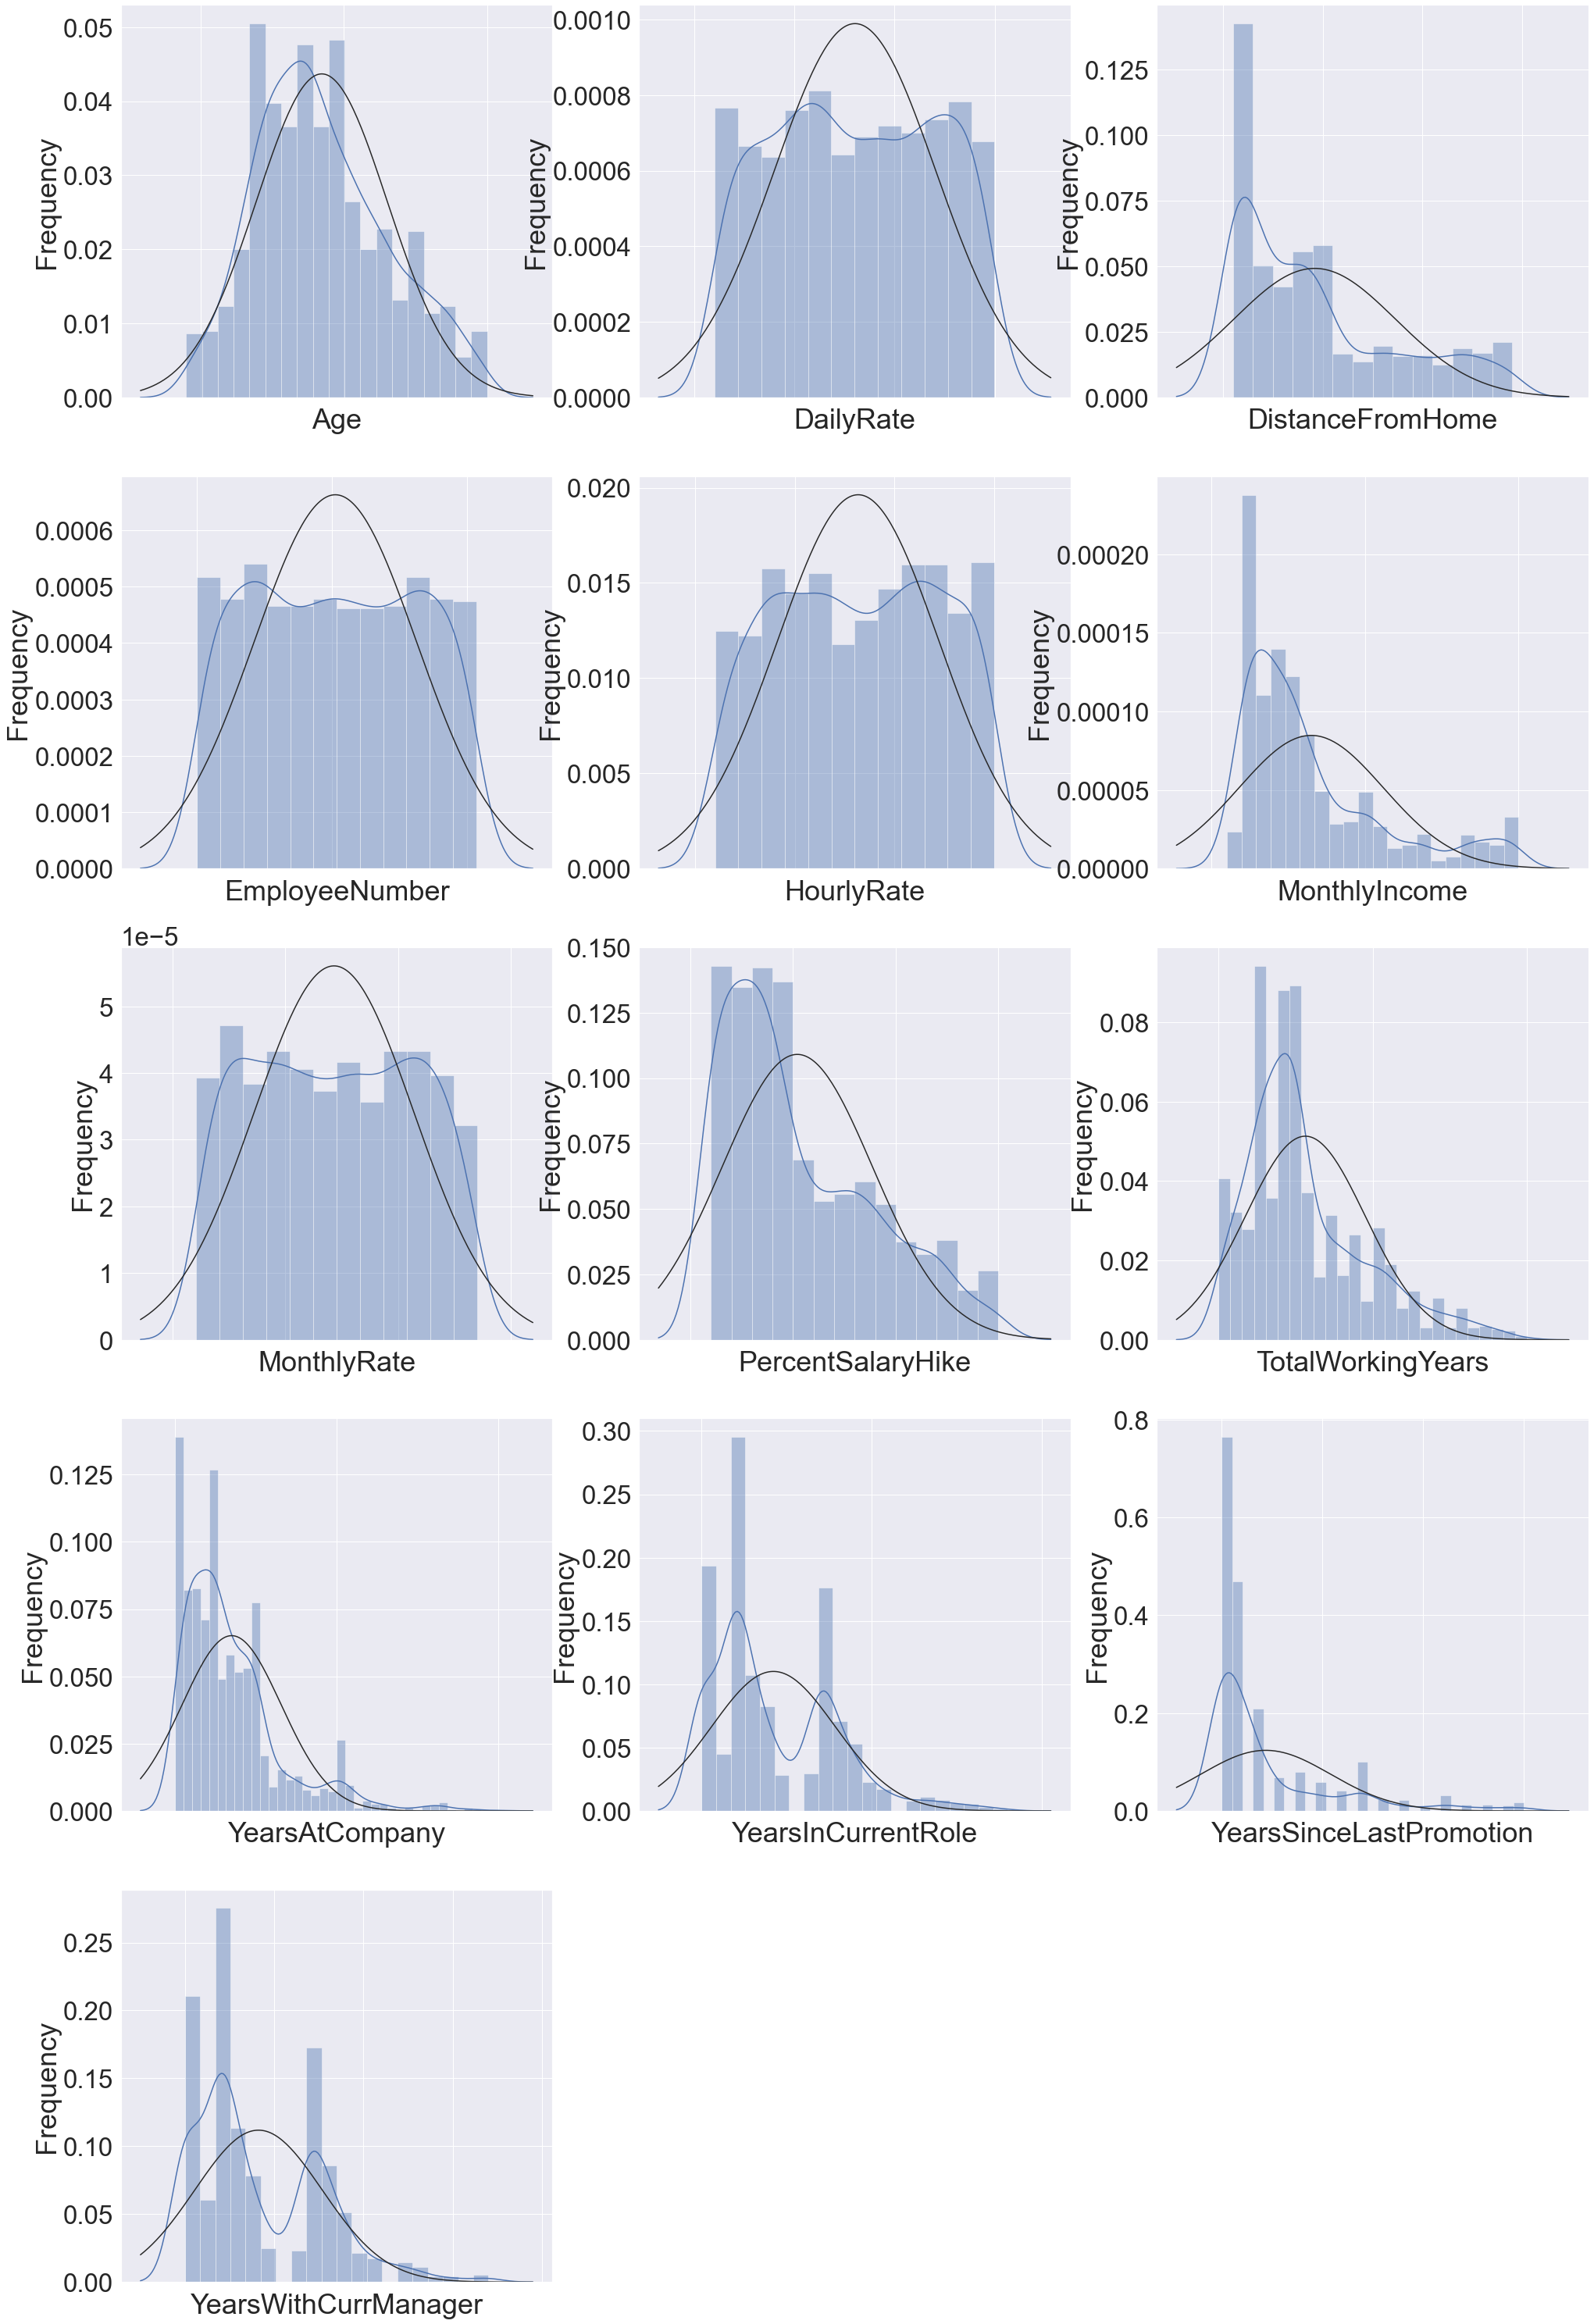

In [10]:
# Let's plot the graph for Non-categorical attributes
sns.set(font_scale=3)
plt.figure(figsize=(30, 50))


for i, column in enumerate(non_categorical_col, 1):
    plt.subplot(5, 3, i)
    g = sns.distplot(dataset[column],fit=norm)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Frequency')
    plt.xlabel(column)

##### By looking at above plots, we can say that:
    a. None of the attributes other than 'Age' are normally distributed
    b. Most of the atttributes have two bumps, which means that the values are unevenly distributed. We can plot Mean and Median for both the classes in Target variable and see whether there is any Linear Seperability.
    c. 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',        'YearsSinceLastPromotion' and 'YearsWithCurrManager' attributes have outliers.

#### Step 8: Let's perform Data Sanitation

#### Let's check whether there are any null values

In [11]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Since we don't have null values, we can proceed with other steps

#### Let's check which Non-categorical attributes have Outliers 

In [12]:
# Mathematical Outlier detection

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [13]:
for i in non_categorical_col:
    print(f"Number of Outliers in {i} is:", len(outliers_iqr(dataset[i])[0]))

Number of Outliers in Age is: 0
Number of Outliers in DailyRate is: 0
Number of Outliers in DistanceFromHome is: 0
Number of Outliers in EmployeeNumber is: 0
Number of Outliers in HourlyRate is: 0
Number of Outliers in MonthlyIncome is: 114
Number of Outliers in MonthlyRate is: 0
Number of Outliers in PercentSalaryHike is: 0
Number of Outliers in TotalWorkingYears is: 63
Number of Outliers in YearsAtCompany is: 104
Number of Outliers in YearsInCurrentRole is: 21
Number of Outliers in YearsSinceLastPromotion is: 107
Number of Outliers in YearsWithCurrManager is: 14


##### There are six attributes which have outliers. Among them two of them, 'YearsInCurrentRole' and 'YearsWithCurrManager' have minimal number of outliers and rest of them have outliers between 5% and 8%. Since there are not many outliers, let's check min and max values of each attribute and remove that data if values are unreal.

In [14]:
for i in non_categorical_col:
    if len(outliers_iqr(dataset[i])[0]) >0:
        print(i)
        print('Minimum value:', min(dataset[i]))
        print('Maximum value:', max(dataset[i]))
        print()

MonthlyIncome
Minimum value: 1009
Maximum value: 19999

TotalWorkingYears
Minimum value: 0
Maximum value: 40

YearsAtCompany
Minimum value: 0
Maximum value: 40

YearsInCurrentRole
Minimum value: 0
Maximum value: 18

YearsSinceLastPromotion
Minimum value: 0
Maximum value: 15

YearsWithCurrManager
Minimum value: 0
Maximum value: 17



##### By looking at values above, we can say that min and max values of all the six attributes are real. So,we can proceed with further steps.

#### Let's check whether there are any duplicates and remove them

In [15]:
# Check for duplicates
duplicate = dataset[dataset.duplicated()]

# This will fetch rows which are duplicate. As seen below, there are no duplicate rows in the Dataframe.
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


##### There are no duplicates in the data. Now we can remove the attributes which don't add any value.

In [16]:
dataset = dataset.drop('EmployeeCount', axis=1)
dataset = dataset.drop('EmployeeNumber', axis=1)
dataset = dataset.drop('Over18', axis=1)
dataset = dataset.drop('StandardHours', axis=1)

In [17]:
dataset.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EnvironmentSatisfaction,2,3,4,4,1
Gender,Female,Male,Male,Female,Male


##### Now that we have removed, 'EmployeeCount', 'EmployeeNumber', 'Over18' and 'StandardHours' attributes in the dataset, let's remove them in 'categorical_col' and 'non_categorical_col' lists also.

In [18]:
for i in ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']:
    if i in categorical_col:
        categorical_col.remove(i)
    else:
        non_categorical_col.remove(i)

#### Step 9: Let's perform Bivariate analysis

#### As first step, let's see whether any of the categorical attributes are correlating with target. To get an idea, let's convert Target to 0 and 1 first and then plot barplot.

In [19]:
dataset['Attrition'] = dataset.Attrition.astype("category").cat.codes

In [20]:
dataset['Attrition'].unique()

array([1, 0], dtype=int8)

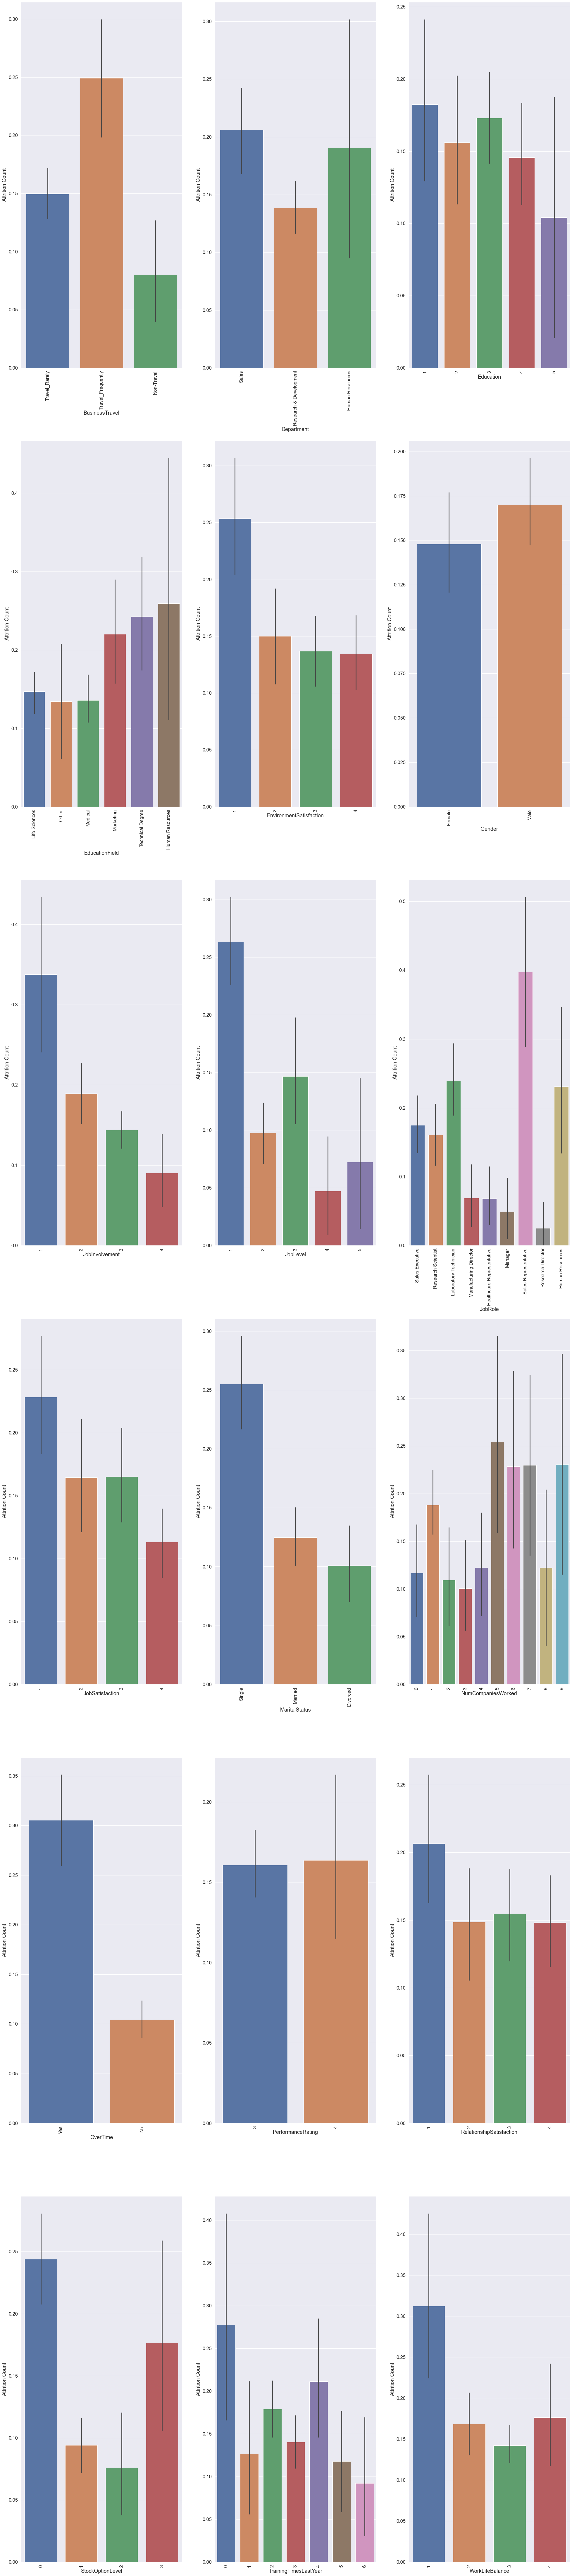

In [21]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.5)
plt.figure(figsize=(30, 150))

for i, column in enumerate(categorical_col[1:], 1):
    plt.subplot(6, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=dataset)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- `BusinessTravel` : Workers who travel alot are more likely to quit than other employees.

- `Department` : Workers in `Research & Development` are more likely to stay than the workers of other department.

- `EducationField` : Workers in `Life Sciences`, `Other` and `Medical` are more likely to stay than the workers of other Educational fields. We can club `Life Sciences`, `Other` & `Medical` to one and rest to another one.  

- `EnvironmentSatisfaction` : Workers in `EnvironmentSatisfaction` level-1 are more likely to quit when compared to others. Since rest of them have similar values, we can club levels 2, 3 and 4.
    
- `JobInvolvement` : Workers with high job involvement are more likely to stay and as the job involvement reduces, Workers are more likely to quit
    
- `JobLevel` : Workers in Job level-1 are more likely to quit when compared to workers in other job levels.

- `JobRole` : Workers in `Sales Representative` job role are more likely to quit, workers in `Laboratory Technician` and `Human Resources` job roles are also more likely to quit but not as much as workers in `Sales Representative` job role. Workers in all other job roles are less likely to quit when compared to these three.

- `JobSatisfaction` : Workers with lowest level of Job satisfaction are more likely to quit and highest level of Job satisfaction are less likely to quit. Also, we can club levels 2 and 3 since they have similar values.

- `MaritalStatus` : Workers who are `Single` are more likely to quit when compared to others. We can club `Married` and `Divorced` classes.

- `OverTime` : Workers who work more `OverTime` are more likely to quit when compared to others.

- `RelationshipSatisfaction` : Workers in `RelationshipSatisfaction` level-1 are more likely to quit when compared to others. Since rest of them have similar values, we can club levels 2, 3 and 4.

- `StockOptionLevel` : Workers in `StockOptionLevel` level-0 are more likely to quit, then the workers in `StockOptionLevel` level-3 when compared to Workers in other `StockOptionLevel`. Also, we can club levels 1 and 2 since they have similar values.

- `WorkLifeBalance` : Workers in `WorkLifeBalance` level-1 are more more likely to quit when compared to workers in other `WorkLifeBalance` levels. Since rest of them have similar values, we can club levels 2, 3 and 4.

*** 

##### Though we have said that we can combine similar levels in a few categorical attributes, it is better that we build a model without clubbing classes first and then build a model with clubbed data.

#### Let's perform Bivariate analysis on Non-categorical attributes.

#### Let's fetch Mean and Median values for both the classes in attrition to see whether we can find Linear Seperability in the data.

In [22]:
dataset[non_categorical_col].groupby(dataset['Attrition']).mean()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,15.231144,11.862936,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.902954,1.945148,2.852321


In [23]:
dataset[non_categorical_col].groupby(dataset['Attrition']).median()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,
0,36,817,7,66,5204,14120,14,10,6,3,1,3
1,32,699,9,66,3202,14618,14,7,3,2,1,2


##### By having a look at Median values, we can say that 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole' and 'YearsWithCurrManager' are showing Linear Seperability in the data.

##### We usually build correlation matrx when we want to do feature engineering. In this case, since we are building classifier model, feature engineering is not required. Hence we can skip plotting Correlation matrix.

##### Now that we have completed EDA, let's move ahead with Model building.

### Let's start with model building

#### Step 1: When we have categorical variables in a dataset, we usually perform Encoding, i.e. to convert it to numerical values. Based on the scenario we have to implement right method of Encoding. Since we have more number of attributes in the current dataset, One Hot Encoding will increase the number of attributes and thus the complexity. So, we will proceed with Label Encoding.

#### Let's fetch all the categorical attributes and see which attributes can be selected for Label Encoding.

In [24]:
dataset[categorical_col].head().T

,0,1,2,3,4
Attrition,1,0,1,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EnvironmentSatisfaction,2,3,4,4,1
Gender,Female,Male,Male,Female,Male
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobRole,Sales Executive,Research Scientist,Laboratory Technician,Research Scientist,Laboratory Technician


##### By looking at the data above, we can say that we can perform Label Encoding on 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus' and 'OverTime' attributes. Let's perform Label Encoding on them.

In [25]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    dataset[column] = label.fit_transform(dataset[column])

#### Step 2: Let's split Train data and Test data

#### Let's split Train data and Test data in 70, 30 ratio

In [26]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Attrition', axis=1)
y = dataset.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#### Step 3: Let's build the basic model without performing any performance improvement steps such as Hyper-parameter tuning.

#### Before proceeding with model building, let's have a look at the parameters in Decision Tree

**Decision Tree parameters:**
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

#### Let's build the model

In [27]:
from sklearn.tree import DecisionTreeClassifier

#Initializing a model and then using '.fit' to build a model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Step 4: Let's validate the results

#### Based on the data we have, we can figure out that two metrics are important to evaluate the model:
    a. Recall(Class-1/Attrition): This is the most important metric because if the employee is going to leave    the company, company will try to retain the employee by providing hike and other perks.
    b. precision(Class-0/No Attrition): This is second most important metric because if the employee is not     going to leave the company, then there is no point in spending the resources.

#### Let's define a function named 'print_score' to give us accuracy score based on the model we use. In below case, we are using 'clf' model to predict the values and hence we get the accuracy score of that model. This model calculates accuracy for both Train data and Test data. We will use this model at later point to get to know the accuracy of the models we built.

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Let's use 'print_score' function to fetch the accuracy of Train data and Test data

In [29]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
_______________________________________________
Conf

##### Just by looking at the Accuracy of Train data and Test data, we can say that this model has a problem of Overfitting. The moment we see problem of Overfitting, we have to check whether the results of Train data and Test data are generalisable. In this case, there's a huge gap in terms of Accuracy and other parameters of Train data and that of Test data. So, we can definitely say that this model has a problem of Overfitting.

##### While analysing the data we got to know that the most important parameter to predict is about who are attritioning. So, here our accuracy would depend on how better we are in terms of predicting class-1, i.e. people who are attritioning. So, in terms of scores predicted recall of class-1 is the most important score. Here we can see that recall of class-1 for test data is 0.33. So, this model is less effective interms of predicting who are attritioning. So, we have to try other building other models or increase the accuracy using Ensembles.

##### Now that we hev built vanilla version of the Decision Tree model, let's tune the model and see whether we can reduce the problem of Over Fitting.

#### Step 5: Let's use "max_depth" parameter and try to control overfitting. Let's see whether we will see any better results.

In [30]:
#Initializing a model and then using '.fit' to build a model
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Step 6: Let's validate the results using 'print_score' function

In [31]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.60%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.895966    0.896552  0.896016     0.896259      0.896066
recall       0.989449    0.443182  0.896016     0.716315      0.896016
f1-score     0.940390    0.593156  0.896016     0.766773      0.880999
support    853.000000  176.000000  0.896016  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[844   9]
 [ 98  78]]

Test Result:
Accuracy Score: 83.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.874092   0.321429  0.839002    0.597760      0.797647
recall       0.950000   0.147541  0.839002    0.548770      0.839002
f1-score     0.910467   0.202247  0.839002    0.556357      0.812504
support    380.000000  61.000000  0.839002  441.000000    441.

##### By looking at the accuracy score, we can say that we have reduced the problem of overfitting to a great extent in terms of accuracy. But, still the model is not able to predict class-1 accurately. Let's build a Random Forest model on the same dataset and see whether we get better results.

#### Step 7: Let's build Random Forest model.

#### Before proceeding with model building, let's have a look at the parameters in Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**Random forest algorithm parameters:**
- `n_estimators`: The number of trees or models in the forest.
*** 
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole data is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalisation accuracy.

#### Let's build the model

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

#### Step 8: Let's validate the results using 'print_score' function

In [33]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.978161    0.987421  0.979592     0.982791      0.979745
recall       0.997655    0.892045  0.979592     0.944850      0.979592
f1-score     0.987812    0.937313  0.979592     0.962563      0.979175
support    853.000000  176.000000  0.979592  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[851   2]
 [ 19 157]]

Test Result:
Accuracy Score: 82.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873762   0.270270  0.823129    0.572016      0.790286
recall       0.928947   0.163934  0.823129    0.546441      0.823129
f1-score     0.900510   0.204082  0.823129    0.552296      0.804179
support    380.000000  61.000000  0.823129  441.000000    441.

##### By comparing the results of Random Forest model with Decision Tree model, we can say that Random Forest model has reduced Overfitting to an extent and is performing better in terms of predicting class-0. But, there is no significant improvement in terms of predicting class-1.

##### Now that we have scope to improve the model, we will perform Hyper Parameter Tuning on both DecisionTreeClassifier and RandomForestClassifier models and see whether we get better results. As part of this we will pass parameters and values for a few parameters so that system Hyper Parameter Tuning will be performed only based on those parameters and values.

#### Step 9: Let's build Decision Tree model by performing Hyper parameter Tuning using 'GridSearchCV'

#### Since the most important parameter is 'Recall' for Class-1, let's pass 'recall' as 'scoring' parameter so that 'GridSearchCV' optimises the results accordingly.

#### Let's get the best parameters first using 'GridSearchCV'

In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1,10))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)),
}

# In this block we are fetching the parameters which give us the best model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 5 folds for each of 2052 candidates, totalling 10260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 6320 tasks      | elapsed:   34.3s


Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 10260 out of 10260 | elapsed:   53.4s finished


#### Let's pass those best parameters and build the model

In [35]:
tree_clf = DecisionTreeClassifier(**best_params, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4,
                       random_state=42)

#### Step 10: Let's validate the results using 'print_score' function

In [36]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.958192    0.965278  0.959184     0.961735      0.959404
recall       0.994138    0.789773  0.959184     0.891956      0.959184
f1-score     0.975834    0.868750  0.959184     0.922292      0.957519
support    853.000000  176.000000  0.959184  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[848   5]
 [ 37 139]]

Test Result:
Accuracy Score: 81.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.892670   0.338983  0.818594    0.615827      0.816083
recall       0.897368   0.327869  0.818594    0.612619      0.818594
f1-score     0.895013   0.333333  0.818594    0.614173      0.817320
support    380.000000  61.000000  0.818594  441.000000    441.

##### When we analyse the results of the best model, we can say that though the 'recall' value of test data is a bit higher, we can see that there is Overfitting problem. Since we have mentioned 'recall' as 'scoring' parameter, 'GridSearchCV' may have fetch the best parameters of overall Recall value. Let's reduce the 'max_depth' range and see whether we get better results.

#### Step 11: Let's build Decision Tree model by performing Hyper parameter Tuning further using 'GridSearchCV'.

#### Let's get the best parameters first using 'GridSearchCV'

In [37]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1,7))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)),
}

# In this block we are fetching the parameters which give us the best model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1368 candidates, totalling 6840 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   29.3s


Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 6840 out of 6840 | elapsed:   30.1s finished


#### Let's pass those best parameters and build the model

In [38]:
tree_clf = DecisionTreeClassifier(**best_params, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=19,
                       random_state=42)

#### Step 12: Let's validate the results using 'print_score' function

In [39]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887568    0.692308  0.867833     0.789938      0.854170
recall       0.962485    0.409091  0.867833     0.685788      0.867833
f1-score     0.923510    0.514286  0.867833     0.718898      0.853516
support    853.000000  176.000000  0.867833  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[821  32]
 [104  72]]

Test Result:
Accuracy Score: 87.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891304   0.592593  0.873016    0.741948      0.849986
recall       0.971053   0.262295  0.873016    0.616674      0.873016
f1-score     0.929471   0.363636  0.873016    0.646554      0.851204
support    380.000000  61.000000  0.873016  441.000000    441.

##### When we analyse the results of the model after reducing the 'max_depth' range, we can say that Overfitting has reduced but still the model is not good at predicting class-1. Also, 'GridSearchCV' has fetched the parameters of best model considering Recall as evaluation parameter.

##### Let's perform Hyper parameter Tuning using 'GridSearchCV' on Random Forest model and see whether we get better results. 

#### Step 13: Let's build Random Forest model by performing Hyper parameter Tuning using 'GridSearchCV'

#### While performing Hyper Parameter Tuning on RandomForestClassifier, we have to note that the parameters in DecisionTreeClassifier and RandomForestClassifier are different. So, we have re-write the parameters according to RandomForestClassifier before performing Hyper Parameter Tuning.

#### Let's get the best parameters first using 'GridSearchCV'

In [40]:
n_estimators = [100, 500, 1000]
max_features = ['sqrt', 'log2']
max_depth = (list(range(1,10)))
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="recall", cv=5, verbose=1, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 31.7min finished


Best parameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


#### Let's pass those best parameters and build the model

In [41]:
rf_clf = RandomForestClassifier(**best_params, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=2,
                       random_state=42)

#### Step 14: Let's validate the results using 'print_score' function

In [42]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.66%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.939427    1.000000   0.94655     0.969714      0.949788
recall       1.000000    0.687500   0.94655     0.843750      0.946550
f1-score     0.968768    0.814815   0.94655     0.891791      0.942436
support    853.000000  176.000000   0.94655  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [ 55 121]]

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.872093   0.545455  0.863946    0.708774      0.826912
recall       0.986842   0.098361  0.863946    0.542601      0.863946
f1-score     0.925926   0.166667  0.863946    0.546296      0.820904
support    380.000000  61.000000  0.863946  441.000000    441.

##### When we analyse the results of the best model after removing 'None' from 'max_depth', we can say that Overfitting problem has been reduced but the 'recall' value of class-1 for Test data is still very low.

##### By analysing results of all the models till now, we can say that model built in Step-9(Decision Tree model by performing Hyper parameter Tuning using 'GridSearchCV') has given us best results among all models we have built till now.

#### At this point, we can say that none of the models gave us good results. This may be because of huge imbalance in the data. At this point, it would be better to reduce imbalance using ML techniques and build a model using Decision Tree or Random Forest Classifier or other algorithms.